In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Cargar el dataset
data = pd.read_csv("Mall_Customers.csv")

# Mostrar las primeras filas y la información del dataset
print(data.head())
print(data.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
# Comprobar valores nulos
print(data.isnull().sum())

# Codificar la variable categórica 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar características relevantes
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Mostrar los datos escalados
print(pd.DataFrame(scaled_features, columns=features.columns).head())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defau

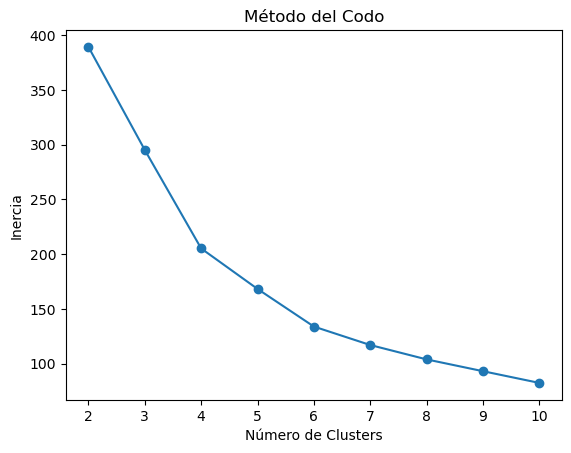

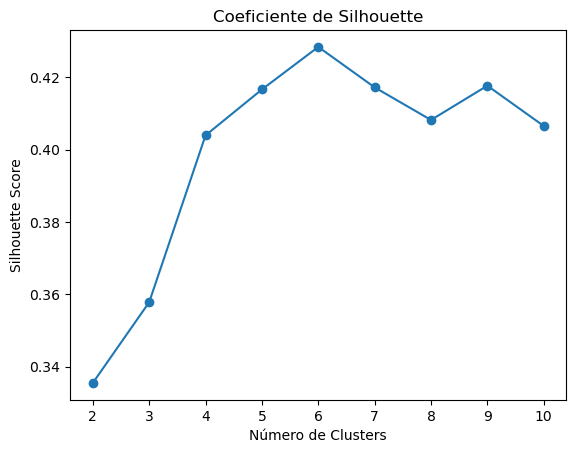

In [8]:
# Método del codo
distortions = []
silhouettes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled_features, kmeans.labels_))

# Gráfico del método del codo
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Gráfico del coeficiente de Silhouette
plt.plot(range(2, 11), silhouettes, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


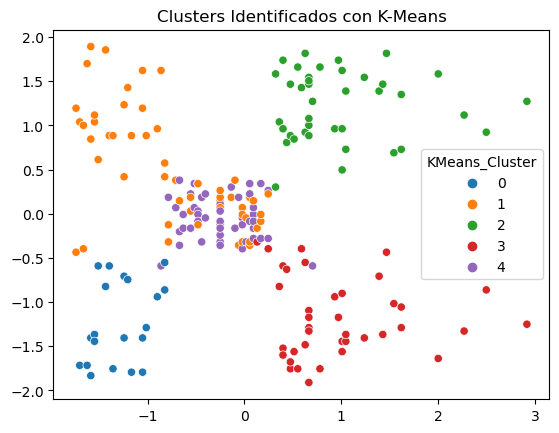

In [13]:
# Entrenar el modelo con K=5 (por ejemplo)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
data['KMeans_Cluster'] = kmeans.labels_

# Visualización de los clusters
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 2], hue=data['KMeans_Cluster'], palette='tab10')
plt.title('Clusters Identificados con K-Means')
plt.show()


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


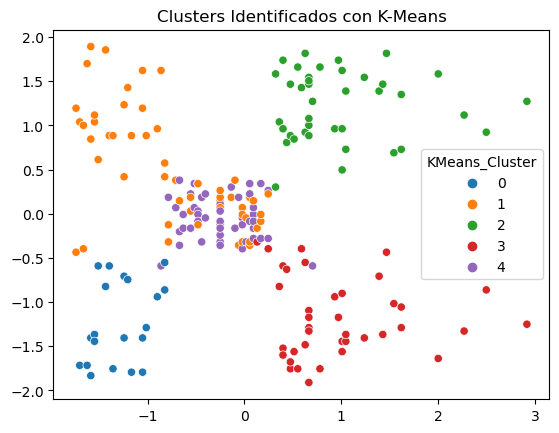

In [15]:
# Entrenar el modelo con K=5 (por ejemplo)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
data['KMeans_Cluster'] = kmeans.labels_

# Visualización de los clusters
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 2], hue=data['KMeans_Cluster'], palette='tab10')
plt.title('Clusters Identificados con K-Means')
plt.show()


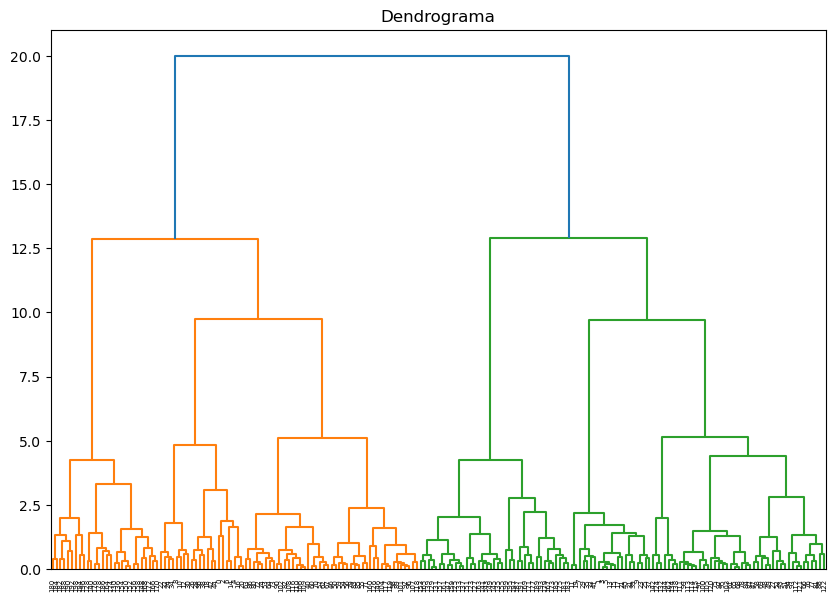

In [18]:
# Generar el dendrograma
Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.show()


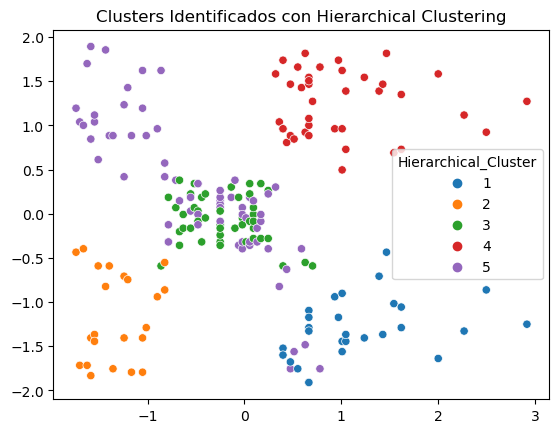

In [20]:
# Cortar el dendrograma para definir clusters
hierarchical_clusters = fcluster(Z, t=5, criterion='maxclust')
data['Hierarchical_Cluster'] = hierarchical_clusters

# Visualización de los clusters jerárquicos
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 2], hue=data['Hierarchical_Cluster'], palette='tab10')
plt.title('Clusters Identificados con Hierarchical Clustering')
plt.show()


In [22]:
# Métricas para K-Means
print("K-Means:")
print("Silhouette Score:", silhouette_score(scaled_features, data['KMeans_Cluster']))
print("Calinski-Harabasz Index:", calinski_harabasz_score(scaled_features, data['KMeans_Cluster']))

# Métricas para Clustering Jerárquico
print("\nHierarchical Clustering:")
print("Silhouette Score:", silhouette_score(scaled_features, data['Hierarchical_Cluster']))
print("Calinski-Harabasz Index:", calinski_harabasz_score(scaled_features, data['Hierarchical_Cluster']))


K-Means:
Silhouette Score: 0.41664341513732767
Calinski-Harabasz Index: 125.10094020060954

Hierarchical Clustering:
Silhouette Score: 0.39002826186267214
Calinski-Harabasz Index: 107.82656032570377


In [24]:
# Guardar el dataset con los clusters
data.to_csv("Mall_Customers_with_Clusters.csv", index=False)
